# WeatherPy
---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Set the seed
np.random.seed(11)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | cole harbour
Processing Record 5 of Set 1 | howard springs
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | nizhnesortymskiy
Processing Record 11 of Set 1 | viana do castelo
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | cabanas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | rabo de peixe
Processing Record 21 of Set 1 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,20.95,48,19,3.69,AU,1730168682
1,adamstown,-25.0660,-130.1015,21.24,74,9,3.56,PN,1730168682
2,atafu village,-8.5421,-172.5159,28.20,73,94,2.80,TK,1730168682
3,cole harbour,44.6724,-63.4751,1.66,76,6,0.89,CA,1730168682
4,howard springs,-12.4970,131.0470,34.95,59,28,3.99,AU,1730168683


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,20.95,48,19,3.69,AU,1730168682
1,adamstown,-25.0660,-130.1015,21.24,74,9,3.56,PN,1730168682
2,atafu village,-8.5421,-172.5159,28.20,73,94,2.80,TK,1730168682
3,cole harbour,44.6724,-63.4751,1.66,76,6,0.89,CA,1730168682
4,howard springs,-12.4970,131.0470,34.95,59,28,3.99,AU,1730168683


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

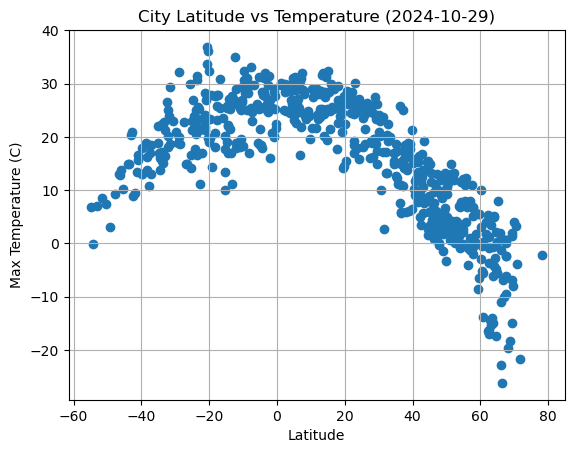

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
# display_date_UTC = city_data_df["Date"][0]
display_date = pd.to_datetime(city_data_df["Date"][0], unit='s').strftime('%Y-%m-%d')
# display_date = pd.to_datetime(display_date_UTC).tz_localize('UTC').tz_convert('America/New_York').date()
plt.scatter(x, y)

# Incorporate the other graph properties
plt.title(f'City Latitude vs Temperature ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

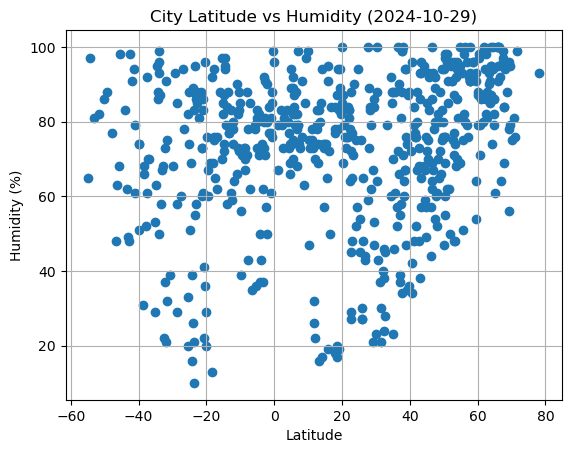

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

y = city_data_df['Humidity']
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Humidity ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

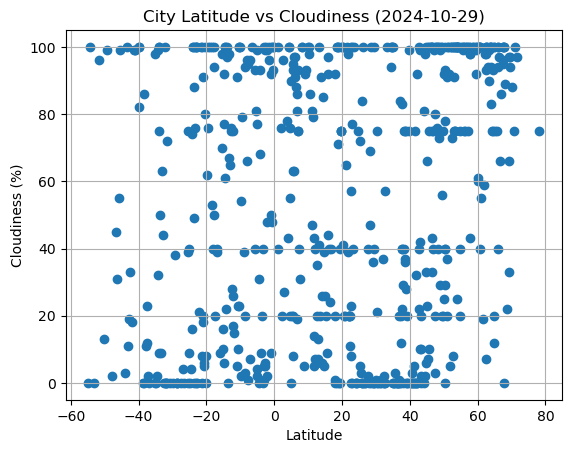

In [11]:
# Build the scatter plots for latitude vs. cloudiness
y = city_data_df['Cloudiness']
plt.scatter(x, y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Cloudiness ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

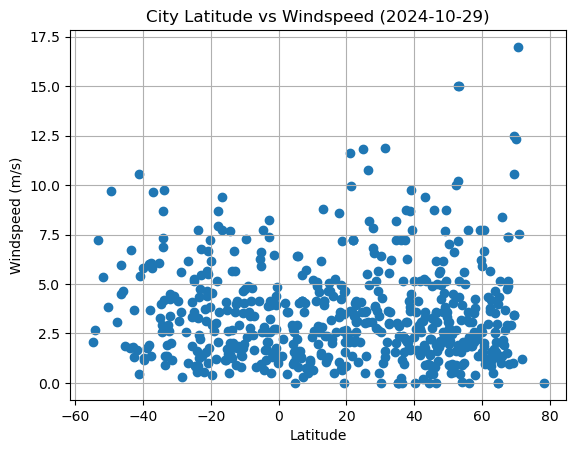

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y = city_data_df['Wind Speed']
plt.scatter(x, y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Windspeed ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Set data ranges forformatting plots 
    x_min = min(x)
    x_max = max(x)
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    # # [xmin, xmax, ymin, ymax]
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title} ({display_date})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].sort_values(by='Lat')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
104,balaipungut,1.0500,101.2833,29.81,67,100,1.35,ID,1730168692
441,simanggang,1.2472,111.4528,30.01,79,40,2.24,MY,1730168725
424,mogadishu,2.0371,45.3438,25.04,83,76,4.06,SO,1730168723
168,mersing,2.4312,103.8405,29.95,79,20,3.60,MY,1730168698
355,sinabang,2.4803,96.3801,28.43,73,96,0.46,ID,1730168716


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].sort_values(by='Lat')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
25,ushuaia,-54.8000,-68.3000,6.81,65,0,2.06,AR,1730168685
10,grytviken,-54.2811,-36.5092,-0.13,97,100,2.66,GS,1730168683
324,punta arenas,-53.1500,-70.9167,7.06,81,0,7.20,CL,1730168713
6,puerto natales,-51.7236,-72.4875,8.53,82,96,5.33,CL,1730168683
482,el calafate,-50.3408,-72.2768,7.37,86,13,3.83,AR,1730168729


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7902475987729494


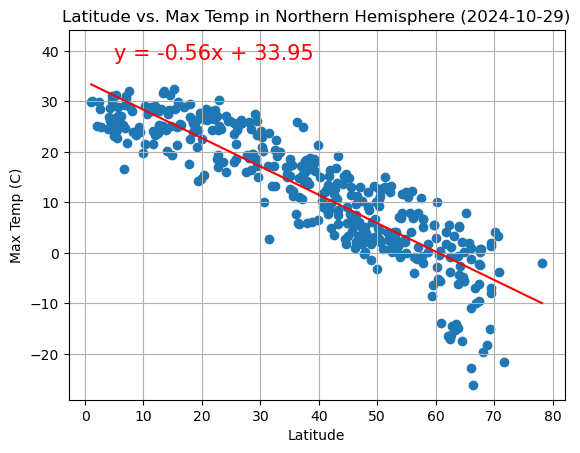

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp (C)', 
                       'Latitude vs. Max Temp in Northern Hemisphere')

The r^2-value is: 0.3939888928440582


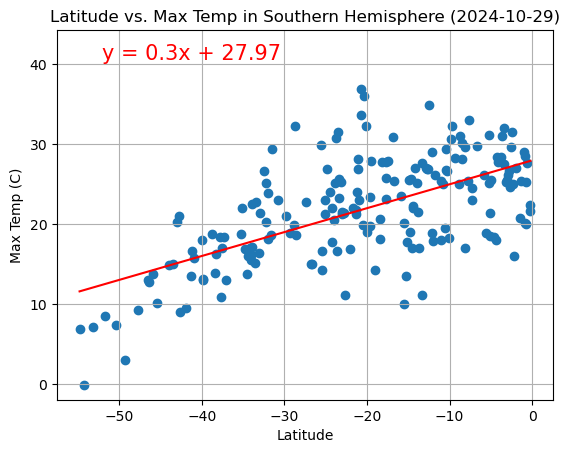

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp (C)', 
                       'Latitude vs. Max Temp in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.07049096102353235


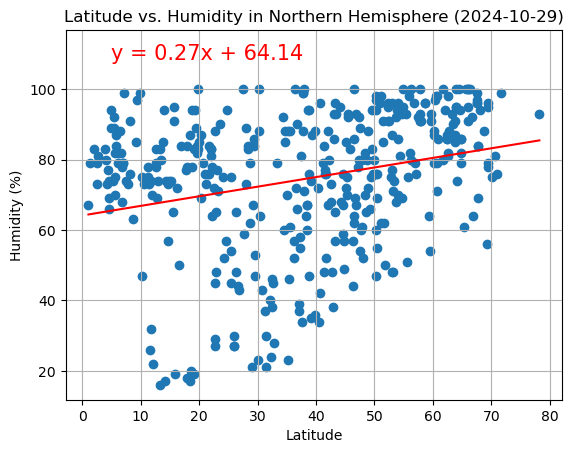

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Latitude vs. Humidity in Northern Hemisphere')

The r^2-value is: 0.003908975927881548


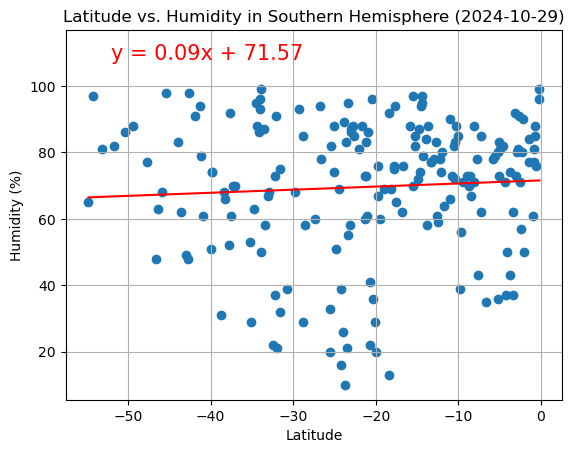

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Latitude vs. Humidity in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0745120380766036


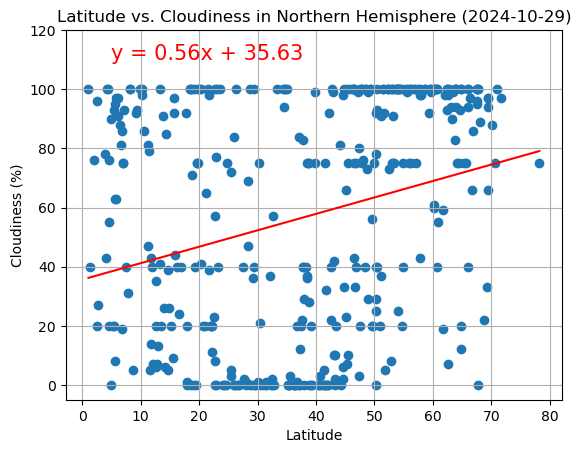

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Latitude vs. Cloudiness in Northern Hemisphere')

The r^2-value is: 0.01673095776265405


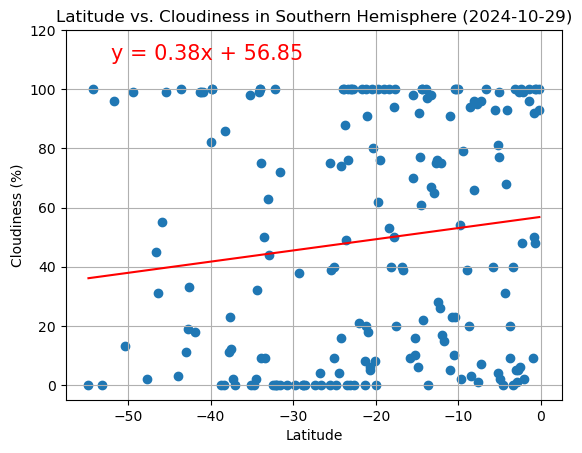

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Latitude vs. Cloudiness in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004588085078104262


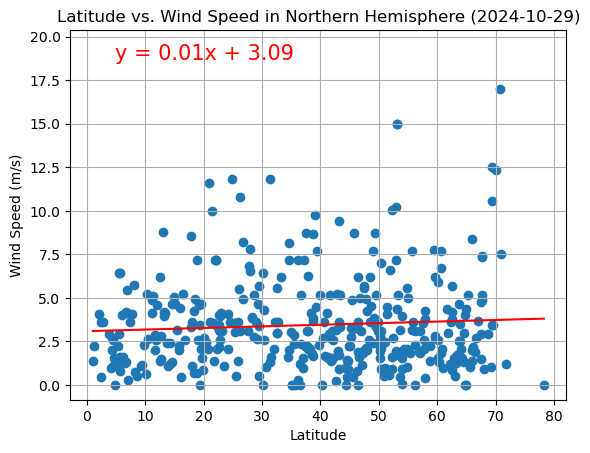

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Latitude vs. Wind Speed in Northern Hemisphere')

The r^2-value is: 0.019935551344511547


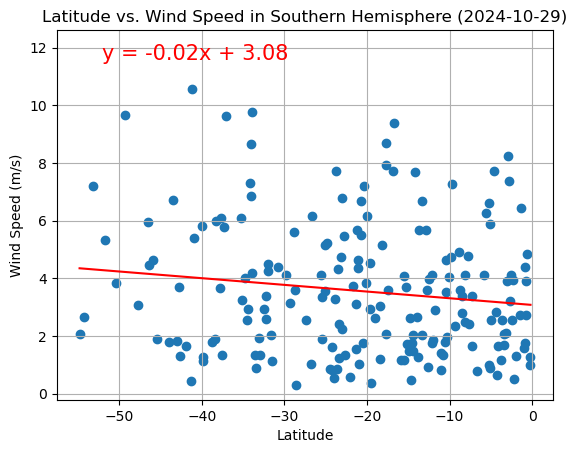

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Latitude vs. Wind Speed in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE